In [64]:
import requests
import json
import sys
import numpy as np
import pandas as pd
import csv
from  keys  import  client_id, api_key
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df_prod_nyc = pd.read_csv('database/Production House_NYC_database.csv')
df_prod_la = pd.read_csv('database/Production House_Los Angeles_database.csv')
df_prod_ga = pd.read_csv('database/Production House_Atlanta_database.csv')

In [66]:
df_prod_nyc.describe()
# '''
# More money in NYC than LA, not by much
# Could be impacted by amount of places that have price listed
# Competition and Property value are things to keep in mind 
# Slightly larger range in NYC than LA, but mostly modest-high cost range (std)

# '''

,Rating,Review Count,Price
count,1000.000000,1000.000000,611.000000
mean,4.186000,458.791000,2.400982
std,0.507111,751.347424,0.683241
min,2.000000,1.000000,1.000000
25%,4.000000,29.750000,2.000000
50%,4.000000,193.500000,2.000000
75%,4.500000,555.000000,3.000000
max,5.000000,10015.000000,4.000000


In [67]:
df_prod_la.describe()
# '''
# LA Reviews the most out of the 3 cities
# Mean rating is much higher than the other cities
# LA has highest std, could have outliers bringing the review count mean up 
# Find neighboorhoods that dont have high ratings to get around customer loyalty


# '''

,Rating,Review Count,Price
count,1000.000000,1000.000000,347.000000
mean,4.494000,470.773000,2.259366
std,0.551151,929.802693,0.619195
min,1.500000,1.000000,1.000000
25%,4.000000,9.000000,2.000000
50%,4.500000,54.000000,2.000000
75%,5.000000,529.750000,3.000000
max,5.000000,8635.000000,4.000000


In [70]:
df_prod_ga.describe()
# Cheper, making less money as Business owners compared to NY and LA
# Less reviews per store in GA than LA or NY, would get less customers


,Rating,Review Count,Price
count,1000.000000,1000.000000,772.000000
mean,3.805500,283.810000,2.018135
std,0.655247,388.948622,0.508993
min,1.000000,1.000000,1.000000
25%,3.500000,54.000000,2.000000
50%,4.000000,173.000000,2.000000
75%,4.000000,364.750000,2.000000
max,5.000000,3949.000000,4.000000


In [71]:
df_prod_ga.describe().loc['mean']



Rating            3.805500
Review Count    283.810000
Price             2.018135
Name: mean, dtype: float64

Float64Index([1.0, 2.0, 3.0, 4.0], dtype='float64')

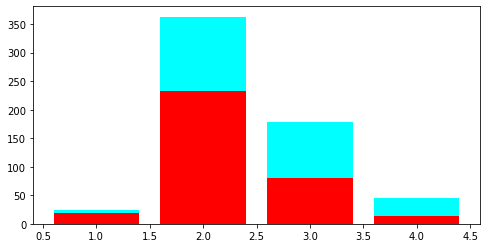

In [119]:
scatter_plot_title = 'Relationship Between Price and Review Count'
x_label = 'Review Count'
y_label = 'Price'
# your code here
tackle_figure, ax = plt.subplots(figsize=(8, 4))

x1 = df_prod_nyc['Price'].value_counts().sort_index().index[:4]
y1 = df_prod_nyc['Price'].value_counts().sort_index()

x2 = df_prod_la['Price'].value_counts().sort_index().index[:4]
y2 = df_prod_la['Price'].value_counts().sort_index()


# y1 = df_prod_nyc['Price'].value_counts().sort_index()
# y2 = df_prod_la['Price'].value_counts()
# x1 = df_prod_nyc['Price'].value_counts().sort_index()
# x2 = df_prod_la['Review Count']
# ax.set_title(scatter_plot_title) #difficulty setting title is because ncols sets an array of 2, but we only have 1 title
# ax.set_xlabel(x_label)
# ax.set_ylabel(y_label)
ax.bar(x1, y1, color='cyan')
ax.bar(x2, y2, color='red');

ValueError: shape mismatch: objects cannot be broadcast to a single shape

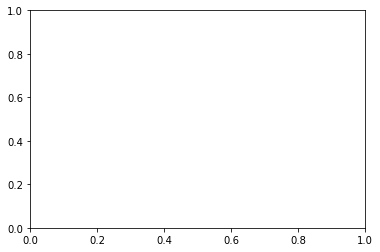

In [120]:
N = 2
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, x1, width, color='royalblue') # yerr=menStd)
womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, x2, width, color='seagreen') # yerr=womenStd
# add some
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )
ax.legend( (rects1[0], rects2[0]), ('NYC', 'NYC') )
plt.show()

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

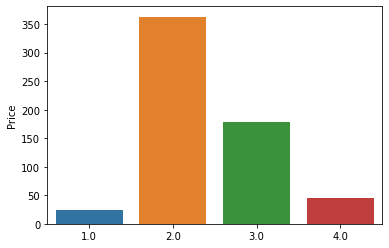

In [123]:
sns.barplot(x1,y1)